<a href="https://colab.research.google.com/github/romaralo/Airbnb/blob/main/airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files

In [ ]:
db=pd.read_excel("/content/drive/MyDrive/listings.xls.csv.xlsx")

In [ ]:
db = pd.read_csv("/content/drive/MyDrive/listings_detailed_filtered.xls.csv.xlxs")

In [ ]:
#cargamos bbdd como panda
db.head(7)

,id_listing,name,description,neighborhood_overview,host_id,host_since,host_about,host_response_time,host_response_rate,host_acceptance_rate,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,6369.0,"Rooftop terrace room , ensuite bathroom",Excellent connection with the AIRPORT and EXHI...,NaN,13660,4/16/2009,"Gay couple, heterofriendly, enjoy having guest...",within a few hours,100%,93%,...,4.86,4.83,4.86,NaN,f,1,0,1,0,0.64
1,21853.0,Bright and airy room,We have a quiet and sunny room with a good vie...,We live in a leafy neighbourhood with plenty o...,83531,2/21/2010,EN-ES-FR\r\nEN\r\nHi everybody: I'm Abdel. I'm...,within an hour,100%,0%,...,4.82,4.21,4.67,NaN,f,2,0,2,0,0.32
2,24805.0,Gran Via Studio Madrid,"Studio located 50 meters from Gran Via, next t...","The area is next to the Gran Via, so people li...",346366726,5/15/2020,NaN,NaN,NaN,NaN,...,4.88,4.96,4.69,NaN,f,1,1,0,0,0.26
3,26825.0,Single Room whith private Bathroom,Nice and cozy roon for one person with a priva...,"Es un barrio muy tranquilo, en una zona de Mad...",114340,4/27/2010,"I like Fine art, Photography, Cinema, travel a...",within a few hours,100%,78%,...,4.71,4.73,4.75,NaN,f,1,0,1,0,1.18
4,30320.0,Great Vacational Apartments,<b>The space</b><br />Fully furnished spacious...,NaN,130907,5/24/2010,Apartasol offers a network of several spacious...,within an hour,100%,100%,...,4.78,4.90,4.69,NaN,f,3,3,0,0,1.11
5,30959.0,Beautiful loft in Madrid Center,Beautiful Loft 60m2 size just in the historica...,NaN,132883,5/26/2010,Estoy empezando en Airbnb y deseo que mis hués...,NaN,NaN,NaN,...,4.63,4.88,4.25,NaN,f,1,1,0,0,0.08
6,40718.0,COZY APARTMENT CIBELES-GRAN VIA-PTA DEL SOL-CH...,"<b>The space</b><br />Apartment, 1 Bedroom + O...",NaN,34217435,5/25/2015,NaN,within an hour,100%,100%,...,4.85,4.95,4.65,NaN,t,10,10,0,0,0.86


In [ ]:
#concer la info de las columnas de mi bbdd
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20887 entries, 0 to 20886
Data columns (total 62 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id_listing                                    20887 non-null  float64
 1   name                                          20883 non-null  object 
 2   description                                   20271 non-null  object 
 3   neighborhood_overview                         11603 non-null  object 
 4   host_id                                       20887 non-null  int64  
 5   host_since                                    20884 non-null  object 
 6   host_about                                    10113 non-null  object 
 7   host_response_time                            15890 non-null  object 
 8   host_response_rate                            15890 non-null  object 
 9   host_acceptance_rate                          16723 non-null 

In [ ]:
#convertimos el type a datatime
db['last_review'] = pd.to_datetime(db['last_review'])

In [ ]:
condition1=(db['review_scores_rating'] >= 4.8 ) 
condition2=(db['reviews_per_month'] >=1.0)
condition3=(db['last_review'] >= '2022-01-01')


# Seleccionamos las filas que cumplen la condición

df = db.loc[condition1 & condition2 & condition3]

#reviso para ver si lo está haciendo bien

df_tres_columnas = df[['review_scores_rating', 'reviews_per_month', 'last_review']]
df_tres_columnas.head(50)

,review_scores_rating,reviews_per_month,last_review
14,4.81,1.27,2023-01-28
15,4.82,1.59,2023-02-27
38,4.92,3.72,2023-03-13
47,4.90,4.55,2023-03-05
57,4.94,1.28,2023-03-13
60,4.85,2.56,2023-03-13
61,4.87,2.26,2023-02-14
66,4.89,1.24,2023-02-27
67,4.87,1.90,2023-02-24
69,4.87,3.96,2023-03-14


In [ ]:
import numpy as np

#si la estancia min es menor o iual a 6 entonces la estancia media es 6. else round(8+1,33*estancia_min). La estancia media no puede ser mayor de 365 (si sale mayor =365) --> ninimum_nights

df['mean_nights'] = np.where(df['minimum_nights'] <= 6, 6, round(8 + 1.33 * df['minimum_nights'])) #ver como funciona

df['mean_nights']=np.where(df['minimum_nights'] >365,365,df['minimum_nights'])


<ipython-input-17-9140f6fb69b4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mean_nights'] = np.where(df['minimum_nights'] <= 6, 6, round(8 + 1.33 * df['minimum_nights'])) #ver como funciona
<ipython-input-17-9140f6fb69b4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mean_nights']=np.where(df['minimum_nights'] >365,365,df['minimum_nights'])


In [ ]:
#comprobación
df['mean_nights'].unique()

array([  4,   3,   2,   6,   7,   1,  25,   5,  14,  10,  28,  30, 120,
        21,  20, 100,  15,  90,   8,  73, 109, 170, 365,  29,  56,  80,
        31,  32,   9,  18,  35,  23])

In [ ]:
#nueva columna: ocupacion
df['ocupation']=df['mean_nights']*df['number_of_reviews_ltm']

df['ocupation']=np.where(df['ocupation'] >365,365,df['ocupation']) #no mayor de 365

<ipython-input-19-532c75f74d7f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ocupation']=df['mean_nights']*df['number_of_reviews_ltm']
<ipython-input-19-532c75f74d7f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ocupation']=np.where(df['ocupation'] >365,365,df['ocupation']) #no mayor de 365


In [ ]:

#comprobación
df['ocupation'].unique()

array([112,  54, 124, 108,  60, 138, 104,  75, 119, 141,  50,  58, 126,
       102,  84,  52, 114,  63,  88, 144, 125,  42, 110, 156,   4,  90,
       159, 200, 150, 129, 120,  87,  98, 168,  93,  30,  94,  48,  23,
        92,  32,  68, 195,  36,  22,  24,  34, 147,  12,  70,  69,  73,
       188,  15, 111,  27, 213,   6,   2,  45, 116, 162, 176, 180, 107,
       148,  47, 212,  51,  78, 145,  56, 236,  40,  86,  95, 109, 164,
        16,  72,  43,  53,  26, 118,  96,   3,  55,  62,   9, 105, 136,
       336, 174,  74,  35, 205, 184,  76, 158,  66,  80, 154, 189,  44,
        18, 135,  14,  57, 100,  38, 152, 142,  82, 153, 134,  46, 365,
       246, 196, 140, 117, 146, 122, 249,   8, 132, 252, 115, 183,  49,
        77,  33,   5, 216, 192,  37,  28, 160, 230, 128, 171,  61,  10,
         0, 198,  81, 172, 173,  20, 201, 240, 165, 190,  85, 103,  25,
        71, 210,  31,  67,  64,  21, 106, 130,   7, 182, 330, 101, 123,
       264, 231, 204, 121, 194,  59,  19,  41, 258, 178,  39, 17

In [ ]:
df[['mean_nights', 'ocupation']].describe()

,mean_nights,ocupation
count,3502.000000,3502.000000
mean,3.119360,63.032838
std,8.830437,62.210190
min,1.000000,0.000000
25%,1.000000,16.000000
50%,2.000000,44.000000
75%,3.000000,94.000000
max,365.000000,365.000000


In [ ]:
db_sorted = df.sort_values(by='ocupation', ascending=False) # quedarme con los mil primeros que mas ocupen 

db_more_ocupation=db_sorted.head(1000)

In [ ]:
db_more_ocupation

,id_listing,name,description,neighborhood_overview,host_id,host_since,host_about,host_response_time,host_response_rate,host_acceptance_rate,...,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,mean_nights,ocupation
13693,5.307220e+07,"Cozy apartment with AC, heating, garage optional","Apartment of 60m newly renovated, bright, in a...",NaN,353024402,7/2/2020,Estoy disponible durante toda vuestra estancia...,within an hour,100%,98%,...,4.96,NaN,f,6,6,0,0,1.73,31,365
17190,6.870000e+17,Royal Palace cozy apartment,Old coal building stowage of the nineteenth ce...,The location of the apartment is perfect for v...,22041849,10/2/2014,"Mitad madrileña, mitad alemana, el gusto por v...",within a few hours,100%,100%,...,4.77,NaN,f,2,2,0,0,3.71,30,365
12840,5.155864e+07,Cama en dormitorio compartido de 8 mixto,The Central House Lavapiés está situado en el ...,NaN,414244011,7/21/2021,NaN,within an hour,100%,98%,...,4.81,NaN,t,14,0,8,6,35.65,1,365
12898,5.145643e+07,Luxury apartment for 6 with pool and gym,"For your next trip to Madrid, treat yourself t...",NaN,124209859,4/4/2017,NaN,within an hour,100%,100%,...,4.94,NaN,t,1,1,0,0,1.21,28,365
14138,5.429314e+07,PALACIO DE HIELO - IFEMA - a estrenar ¡!,Maravilloso apartamento en zona residencial qu...,NaN,220103569,10/11/2018,NaN,within an hour,100%,100%,...,4.91,NaN,f,79,79,0,0,1.65,20,365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17098,6.890000e+17,Acogedor y luminoso piso con piscina en Madrid,"Disconnect in a quiet apartment, decorated wit...","The periphery is also Madrid, but with a much ...",10765698,12/22/2013,"Ingeniero de software profesión por vocación, ...",within a few hours,100%,85%,...,4.94,NaN,f,1,1,0,0,2.39,5,85
14229,5.390000e+17,Luxury Apartamento de 5 hab en el centro de Ma...,Amazing 5 bedroom apartment in the heart of Ma...,An unbeatable choice to enjoy Madrid<br /><br ...,90615844,8/18/2016,NaN,within an hour,100%,100%,...,4.85,NaN,t,34,34,0,0,6.69,1,85
13374,5.175913e+07,Beautiful Renovated Loft in the center 9,Spectacular renovated loft with rustic style i...,Located in the heart of one of the most fashio...,107335103,12/15/2016,Hola Viajeros!\n\nSomos la empresa AmazINN Pla...,within an hour,99%,100%,...,4.74,NaN,t,96,63,33,0,6.55,1,85
3109,1.712196e+07,Apartamento nuevo con todas las comodidades,Recién reformado y completamente equipado a ci...,Pegado al portal tenéis disponible un supermer...,95927881,9/19/2016,"Apasionada de la lectura, el deporte y los via...",within a few hours,100%,96%,...,4.76,NaN,f,1,1,0,0,1.20,5,85


In [ ]:
#contamos el numero de veces que sale cada amenities dentro de los 1000 
amenities_list = db_more_ocupation['amenities'].apply(lambda x: x.strip('][').split(', '))
all_words = [word for sublist in amenities_list for word in sublist]

conteo_palabras = {}
for palabra in all_words:
    if palabra not in conteo_palabras:
        conteo_palabras[palabra] = 1
    else:
        conteo_palabras[palabra] += 1


In [ ]:
x=[]
y=[]
for key, value in sorted(conteo_palabras.items(), key=lambda item: item[1], reverse=True):
    if value>=600:
      print(key, value)
      x.append(key)
      y.append(value)



"Essentials" 978
"Dishes and silverware" 954
"Hair dryer" 950
"Kitchen" 948
"Hangers" 947
"Hot water" 924
"Iron" 892
"Cooking basics" 882
"Wifi" 879
"Microwave" 866
"Refrigerator" 830
"Bed linens" 796
"Shampoo" 736
"Heating" 732
"Long term stays allowed" 612


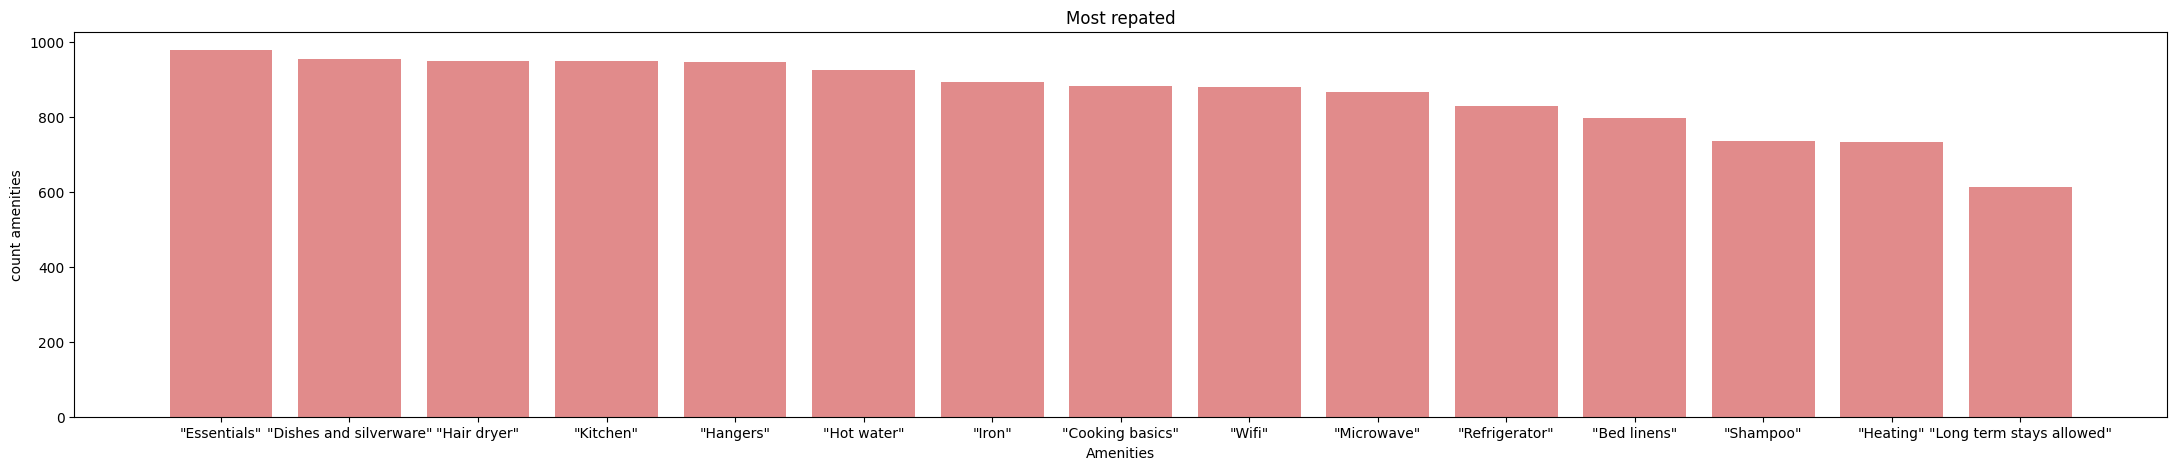

In [ ]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(27,5))
ax.bar(x, y,color='#E18B8B' )
plt.title('Most repated')
plt.xlabel('Amenities')
plt.ylabel('count amenities')

plt.show()



In [ ]:
# Quiero ver los ratings de las más ocupadas, cuál es más importante.

media_scores_rating = db_more_ocupation["review_scores_rating"].mean()
media_scores_accuracy= db_more_ocupation["review_scores_accuracy"].mean()
media_scores_cleanliness = db_more_ocupation["review_scores_cleanliness"].mean()
media_scores_checkin = db_more_ocupation["review_scores_checkin"].mean()
media_scores_communication = db_more_ocupation["review_scores_communication"].mean()
media_scores_location = db_more_ocupation["review_scores_location"].mean()
print("La media de rating, accuracy,cleanliness,checkin,communication,location", media_scores_rating,
      media_scores_accuracy,media_scores_cleanliness,media_scores_checkin,media_scores_communication,
      media_scores_location)


La media de rating, accuracy,cleanliness,checkin,communication,location 4.88844 4.91317 4.89383 4.91524 4.93522 4.89342


In [ ]:
# More_ocupation tiene el filtro de las reviews.
busqueda = db_more_ocupation["review_scores_rating"].between(0,4.75)

if db_more_ocupation["review_scores_rating"].between(0,4.75).any():
    print("Hay valores")
else:
    print("No hay valores")


No hay valores


In [ ]:
# Con ocupación primera con los ratings también
media_ocupation = db_more_ocupation["ocupation"].mean()
print(media_ocupation)

142.522


In [ ]:
# Aquí calculamos la ocupación de cada una. Para toda la base de datos.

db['mean_nights1'] = np.where(db['minimum_nights'] <= 6, 6, round(8 + 1.33 * db['minimum_nights'])) #ver como funciona

db['mean_nights1']=np.where(db['minimum_nights'] >365,365,db['minimum_nights'])

db['ocupation1']=db['mean_nights1']*db['number_of_reviews_ltm']

db['ocupation1']=np.where(db['ocupation1'] >365,365,db['ocupation1']) #no mayor de 365

db[['mean_nights1', 'ocupation1']].describe()

,mean_nights1,ocupation1
count,20887.000000,20887.000000
mean,6.794657,32.302102
std,24.647392,51.626168
min,1.000000,0.000000
25%,1.000000,0.000000
50%,2.000000,9.000000
75%,3.000000,44.000000
max,365.000000,365.000000


In [ ]:
print(len(db['ocupation1']))

20887


In [ ]:
db_sorted = db.sort_values(by='ocupation1', ascending=False) # quedarme con los mil primeros que mas ocupen 

db_mas_ocu=db_sorted.head(2000)
media = db_mas_ocu["ocupation1"].mean()
print(media)

158.6365


In [ ]:
media_scores_rating = db_mas_ocu["review_scores_rating"].mean()
media_scores_accuracy= db_mas_ocu["review_scores_accuracy"].mean()
media_scores_cleanliness = db_mas_ocu["review_scores_cleanliness"].mean()
media_scores_checkin = db_mas_ocu["review_scores_checkin"].mean()
media_scores_communication = db_mas_ocu["review_scores_communication"].mean()
media_scores_location = db_mas_ocu["review_scores_location"].mean()
print("La media de rating, accuracy,cleanliness,checkin,communication,location", media_scores_rating,
      media_scores_accuracy,media_scores_cleanliness,media_scores_checkin,media_scores_communication,
      media_scores_location)

La media de rating, accuracy,cleanliness,checkin,communication,location 4.719564999999999 4.78665 4.746225000000001 4.827190000000001 4.83901 4.861770000000001


In [ ]:
# Vemos si hay valores, comprobar si nos hemos equivocado o nope.
busqueda = db_mas_ocu["review_scores_rating"].between(0,4.75)

if db_mas_ocu["review_scores_rating"].between(0,4.75).any():
    print("Hay valores")
else:
    print("No hay valores")

Hay valores


In [ ]:
print(len(db_mas_ocu))

2000


In [ ]:
media_resp_rate = db_mas_ocu["host_response_rate"].mean()
media_acep_rate= db_mas_ocu["host_acceptance_rate"].mean()

print(media_resp_rate,media_acep_rate)

TypeError: ignored

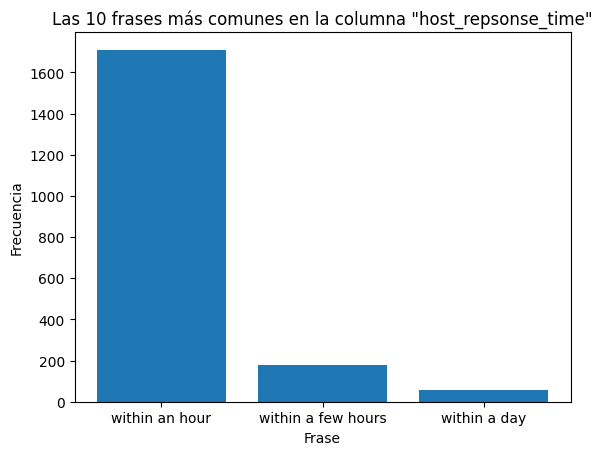

In [ ]:
# Las tres frases más repetidas en el response rate.
from collections import Counter
import matplotlib.pyplot as plt

# Obtener las frases de la columna y contarlas
frases_contadas = Counter(db_mas_ocu['host_response_time'])

# Obtener las 10 frases más comunes y sus frecuencias
top_frases = frases_contadas.most_common(3)

# Crear una lista de las frases y una lista de sus frecuencias
frases = [frase for frase, frecuencia in top_frases]
frecuencias = [frecuencia for frase, frecuencia in top_frases]

# Crear el gráfico de barras
plt.bar(frases, frecuencias)

# Añadir etiquetas y título
plt.xlabel('Frase')
plt.ylabel('Frecuencia')
plt.title('Las 10 frases más comunes en la columna "host_repsonse_time"')

# Mostrar el gráfico
plt.show()



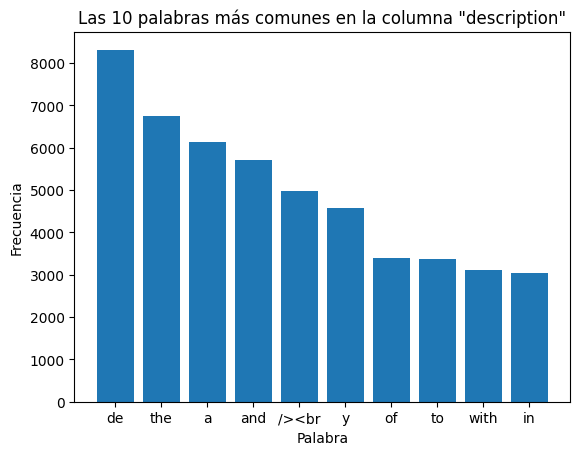

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

# Paso 1: Concatenar las frases de la columna "description"
texto = ' '.join(db_mas_ocu['description'].astype(str))

# Paso 2: Dividir la cadena de texto en una lista de palabras
palabras = texto.split()

# Paso 3: Contar las ocurrencias de cada palabra en la lista
palabras_contadas = Counter(palabras)

# Paso 4: Obtener las 10 palabras más comunes y sus frecuencias
top_palabras = palabras_contadas.most_common(10)

# Paso 5: Crear listas de palabras y frecuencias
palabras = [palabra for palabra, frecuencia in top_palabras]
frecuencias = [frecuencia for palabra, frecuencia in top_palabras]

# Paso 6: Crear el gráfico de barras
plt.bar(palabras, frecuencias)
plt.xlabel('Palabra')
plt.ylabel('Frecuencia')
plt.title('Las 10 palabras más comunes en la columna "description"')
plt.show()


In [ ]:
pip install mtranslate


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for mtranslate: filename=mtranslate-1.8-py3-none-any.whl size=3697 sha256=2064e4adec285f2b1f9df0e31abf10361f7b83ab04792c21cacb9b9a801a930d
  Stored in directory: /root/.cache/pip/wheels/a2/20/13/93c62f314d4a29db25b1b24b2c38f79eb1beb558c727b894a3
Successfully built mtranslate


In [ ]:
# Host_neighbourdhood: info personal no nos interesa yo creo.
from collections import Counter
import matplotlib.pyplot as plt

# Paso 1: Concatenar las frases de la columna "description"
texto = ' '.join(db_mas_ocu['host_neighbourhood'].astype(str))

# Paso 2: Dividir la cadena de texto en una lista de palabras
palabras = texto.split()

# Paso 3: Contar las ocurrencias de cada palabra en la lista
palabras_contadas = Counter(palabras)

# Paso 4: Obtener las 10 palabras más comunes y sus frecuencias
top_palabras = palabras_contadas.most_common(15)

# Paso 5: Crear listas de palabras y frecuencias
palabras = [palabra for palabra, frecuencia in top_palabras]
frecuencias = [frecuencia for palabra, frecuencia in top_palabras]

# Paso 6: Crear el gráfico de barras
plt.figure(figsize=(15, 10))
plt.bar(palabras, frecuencias)
plt.xlabel('Palabra')
plt.ylabel('Frecuencia')
plt.title('Las 10 palabras más comunes en la columna host_neighbourhood')
plt.show()


KeyError: ignored

In [ ]:
# Paso 5: Crear el histograma
plt.figure(figsize=(20, 10))
plt.bar(anios, frecuencias,color='#E18B8B' )
plt.xlabel('Year', fontsize=30)
plt.ylabel('Frecency', fontsize=24)
plt.title('Host since (más ocupados)', fontsize=24)
plt.show()

In [ ]:
print(len(db))

20887


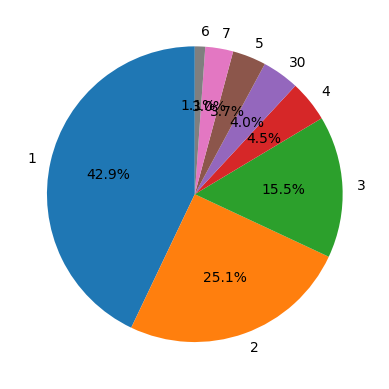

In [ ]:
# Vamos a contar de estas 2000 que son las más ocupadas, cuántas son de larga estancia.

import matplotlib.pyplot as plt
from collections import Counter

# Contar las ocurrencias de cada valor en la columna "minimum_nights"
ocurrencias = db_mas_ocu["minimum_nights"].value_counts()

# Filtrar los valores mayores que 28
ocurrencias_filtradas = ocurrencias[ocurrencias.index >= 28]

# Obtener las ocurrencias de cada valor en la columna 'minimum_nights'
ocurrencias = db_mas_ocu['minimum_nights'].value_counts()
ocurrencias1 =db['minimum_nights'].value_counts()

# Convertir la serie en un objeto Counter
#contador = Counter(dict(ocurrencias_filtradas))
#contador = Counter(dict(ocurrencias))#SALE PIE CHART CON LAS QUE MÁS SALEN EN GENERAL SIN TENER EN CUENTA LARGAS ESTANCIAS.
contador= Counter(dict(ocurrencias1)) #Sólo cuenta las que están ocupadas al menos una vez

# Obtener las 8 ocurrencias más comunes
ocurrencias_filtradas = contador.most_common(8)

labels = [str(valor) for valor, frecuencia in ocurrencias_filtradas]
sizes = [frecuencia for valor, frecuencia in ocurrencias_filtradas]

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.show()


In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

texto = ' '.join(db_mas_ocu['instant_bookable'].astype(str))
palabras = texto.split()

palabras_contadas = Counter(palabras)

top_palabras = palabras_contadas.most_common(7)

palabras = [palabra for palabra, frecuencia in top_palabras]
frecuencias = [frecuencia for palabra, frecuencia in top_palabras]

plt.pie(frecuencias, labels=palabras, autopct='%1.1f%%')
plt.title('Las palabras más comunes en la columna instant bookable')
plt.show()

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

texto = ' '.join(db_mas_ocu['host_is_superhost'].astype(str))
palabras = texto.split()

palabras_contadas = Counter(palabras)

top_palabras = palabras_contadas.most_common(7)

palabras = [palabra for palabra, frecuencia in top_palabras]
frecuencias = [frecuencia for palabra, frecuencia in top_palabras]

plt.pie(frecuencias, labels=palabras, autopct='%1.1f%%')
plt.title('Las palabras más comunes en la columna host is superhost')
plt.show()

In [ ]:
print(len(db_mas_ocu))

<ipython-input-41-b9263b415db4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = pd.DatetimeIndex(df['host_since']).year


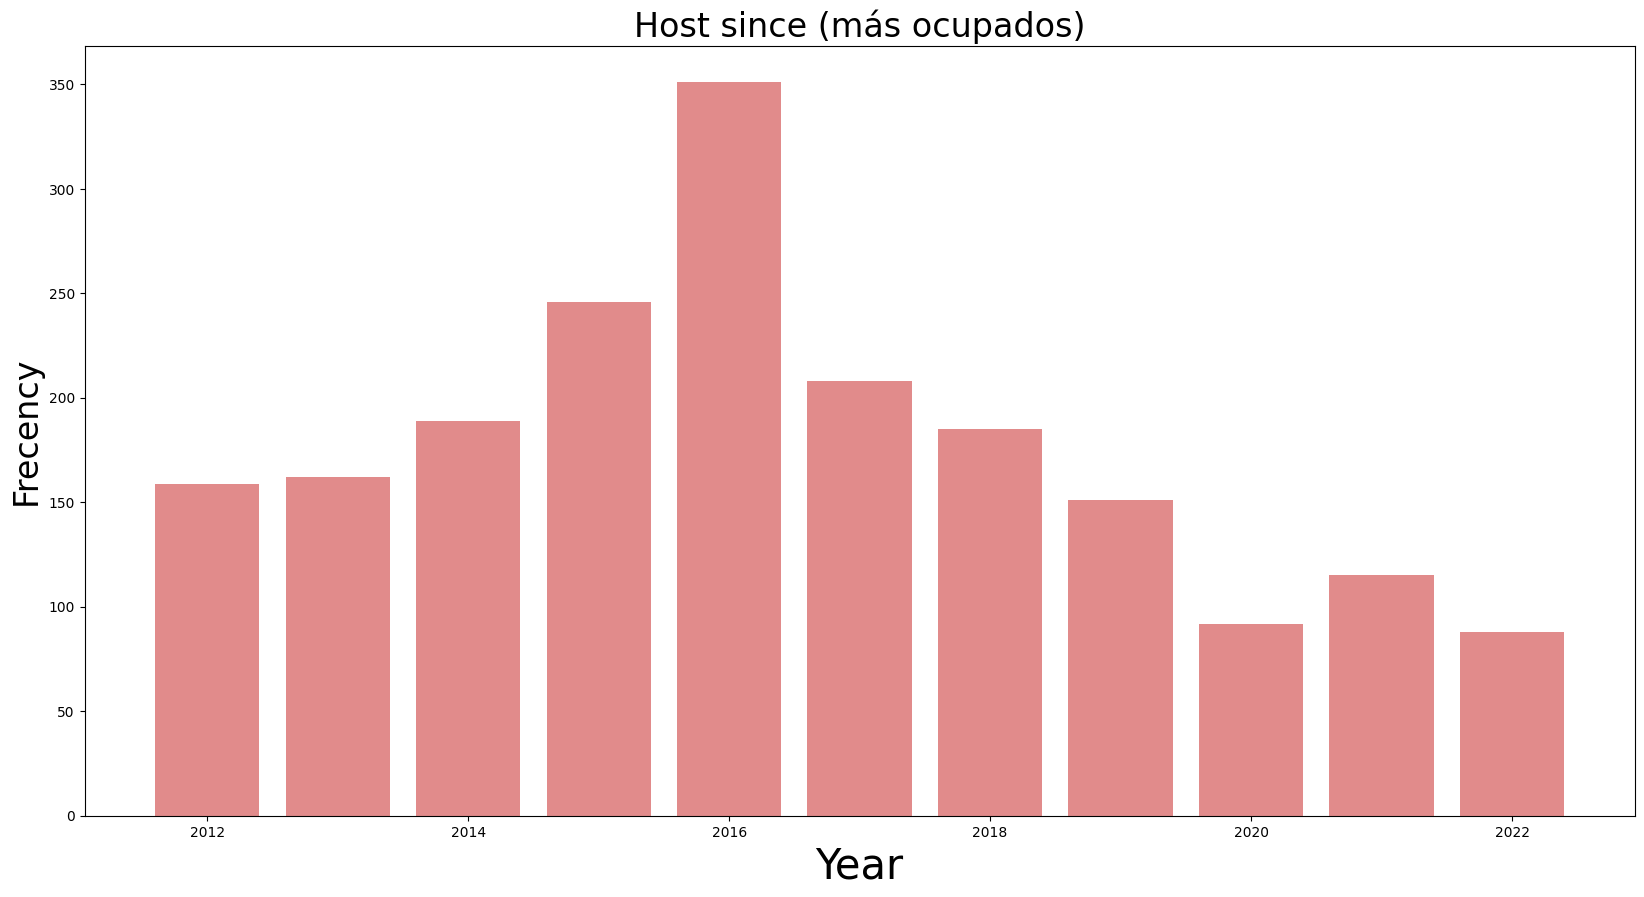

In [ ]:
from collections import Counter
import pandas as pd

# Paso 1: Extraer el año de la columna 'host_since'
df = db_mas_ocu
df['year'] = pd.DatetimeIndex(df['host_since']).year

# Paso 2: Contar las ocurrencias de cada año
ocurrencias = Counter(df['year'])

# Paso 3: Obtener los 10 años más comunes y sus frecuencias
top_anios = ocurrencias.most_common(11)

# Paso 4: Crear listas de años y frecuencias
anios = [anios for anios, frecuencia in top_anios]
frecuencias = [frecuencia for anios, frecuencia in top_anios]

# Paso 5: Crear el histograma
plt.figure(figsize=(20, 10))
plt.bar(anios, frecuencias,color='#E18B8B' )
plt.xlabel('Year', fontsize=30)
plt.ylabel('Frecency', fontsize=24)
plt.title('Host since (más ocupados)', fontsize=24)
plt.show()



In [ ]:
# Convertir la columna "price" a un valor numérico.

# Eliminar el símbolo de dólar y convertir la columna a tipo numérico.
# No se puede seguir ejecutando porque al tenerlo ya cambiado da errores.
#db_mas_ocu['price'] = db_mas_ocu['price'].str.replace(',', '').str[1:].astype(float)

# Imprimir algunos valores de la columna price
print(db_mas_ocu['price'].head(7))



12945       $99.00
2003       $110.00
2976       $151.00
11778       $45.00
4829        $18.00
16311    $9,000.00
14825       $67.00
Name: price, dtype: object


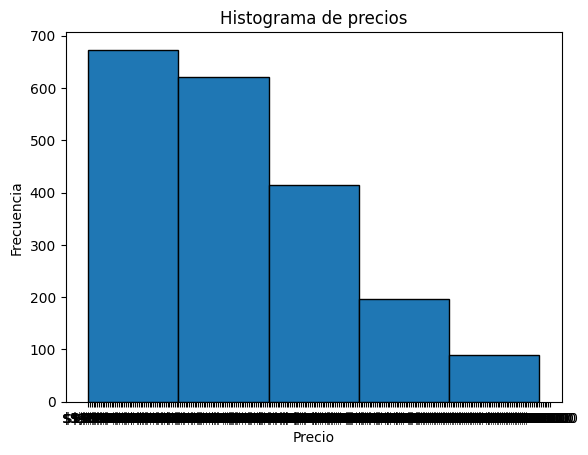

In [ ]:
# Está un poco raro el histograma, estaría mejor si apareciese el intervalo
# debajo de cada barra.
import matplotlib.pyplot as plt

# Seleccionar la columna "price"
precio = db_mas_ocu["price"]

# Definir los intervalos de los rangos
intervalos = range(0, 300, 50)

# Crear el histograma con los intervalos definidos
plt.hist(precio, bins=intervalos,edgecolor='black')

# Agregar etiquetas al gráfico
plt.xlabel("Precio")
plt.ylabel("Frecuencia")
plt.title("Histograma de precios")

# Mostrar el gráfico
plt.show()


In [ ]:
db["host_response_rate"] = db["host_response_rate"].str.replace('%', '').astype(float) / 100
media_acep_rate= db["host_acceptance_rate"].mean()
print(media_acep_rate)

TypeError: ignored

In [ ]:
db["host_response_rate"]

0        1.00
1        1.00
2         NaN
3        1.00
4        1.00
         ... 
20882    0.99
20883    0.99
20884    1.00
20885    1.00
20886     NaN
Name: host_response_rate, Length: 20887, dtype: float64

In [ ]:
print(len(db['ocupation1']))

20887


In [ ]:
# Pillo todos los desocupados. 7200 por ejemplo y voy a ver cuantos son superhosts.

condition1=(db['review_scores_rating'] >= 4.8 ) 
condition2=(db['ocupation1'] >=100)
condition3=(db['host_response_rate'] >= 0.9)


# Seleccionamos las filas que cumplen la condición

df = db.loc[condition1 & condition2 & condition3]

#reviso para ver si lo está haciendo bien

df_tres_columnas = df[['review_scores_rating', 'ocupation1', 'host_response_rate']]
df_tres_columnas.head(10)


,review_scores_rating,ocupation1,host_response_rate
14,4.81,112,1.0
38,4.92,124,1.0
47,4.90,108,1.0
60,4.85,138,1.0
61,4.87,104,1.0
67,4.87,119,1.0
69,4.87,141,1.0
75,4.93,119,1.0
94,4.84,126,1.0
100,4.87,102,1.0


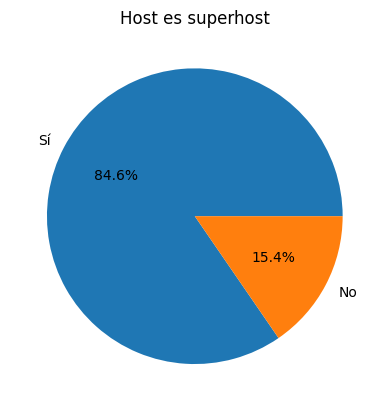

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

texto = ' '.join(df['host_is_superhost'].astype(str))
palabras = texto.split()

palabras_contadas = Counter(palabras)

top_palabras = palabras_contadas.most_common(2)

# Reemplazar las palabras originales por las nuevas palabras
palabras = ['Sí' if palabra == 't' else 'No' for palabra, frecuencia in top_palabras]
frecuencias = [frecuencia for palabra, frecuencia in top_palabras]


plt.pie(frecuencias, labels=palabras, autopct='%1.1f%%')
plt.title('Host es superhost')
plt.show()



In [ ]:
# Paso 5: Crear el histograma
plt.figure(figsize=(20, 10))
plt.bar(anios, frecuencias,color='#E18B8B' )
plt.xlabel('Year', fontsize=30)
plt.ylabel('Frecency', fontsize=24)
plt.title('Host since (más ocupados)', fontsize=24)
plt.show()



In [ ]:
print(ocurrencias)

1      5382
2      3359
3      2262
4       632
5       480
       ... 
140       1
119       1
93        1
160       1
24        1
Name: minimum_nights, Length: 65, dtype: int64


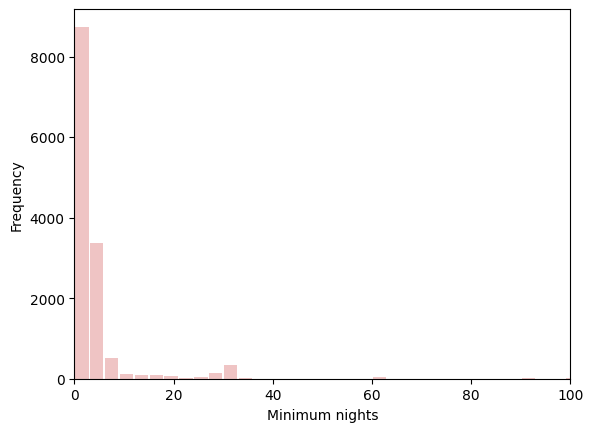

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


# Filtrar las entradas con ocupancy1 mayor que 1
db_ocupadas = db[db["ocupation1"] >=1]

# Contar las ocurrencias de cada valor en la columna "minimum_nights"
ocurrencias = db_ocupadas["minimum_nights"].value_counts()

# Obtener las 8 ocurrencias más comunes
#ocurrencias_filtradas = ocurrencias[:100]

bins = np.arange(0, db_ocupadas["minimum_nights"].max() + 3, 3)


# Crear un histograma con las ocurrencias
plt.hist(db_ocupadas["minimum_nights"], bins=bins, alpha=0.5,rwidth=0.9,color='#E18B8B')
#plt.hist(ocurrencias.index, bins=bins, alpha=0.5,rwidth=0.9)
plt.xlabel("Minimum nights",fontsize=10)
plt.ylabel("Frequency",fontsize=10)
#plt.legend(["All entries", "Most common entries"])
plt.xlim(0,100)
plt.show()


In [ ]:
print(len(db_ocupadas))


13650


In [ ]:
db[['minimum_nights']].describe()

,minimum_nights
count,20887.000000
mean,7.226026
std,34.324836
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,1125.000000


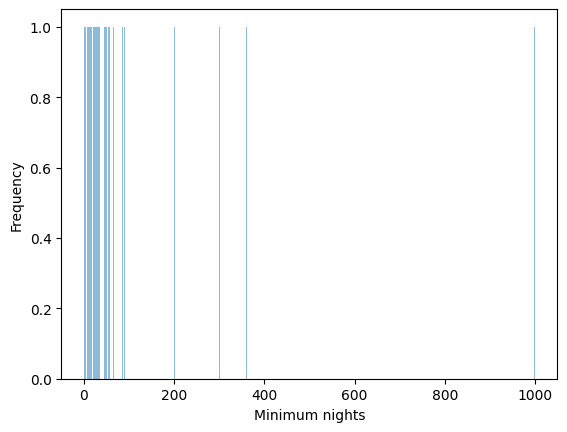

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Filtrar las entradas con ocupancy1 mayor que 1
db_ocupadas = db[db["ocupation1"] >= 1]

# Contar las ocurrencias de cada valor en la columna "minimum_nights"
ocurrencias = db_ocupadas["minimum_nights"].value_counts().head(100)

bins = range(0, ocurrencias.index.max()+1)

# Crear un histograma con las ocurrencias
plt.hist(ocurrencias.index, bins=bins, alpha=0.5, rwidth=0.9)
plt.xlabel("Minimum nights")
plt.ylabel("Frequency")
plt.show()
